In [10]:
import numpy as np
from keras.preprocessing import image
from keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import time
from keras.models import Model
from concurrent.futures import ThreadPoolExecutor, as_completed
from PIL import Image
from itertools import product

def gen_spiral(deltaT, label):
    num_samples = 1000
    n = num_samples // 2
    noise = 1.2
    points = []
    for i in range(n):
        r = i/ n * 20
        t = 2.4  * i /n * math.pi + deltaT
        x = r * math.sin(t) + rand_uniform(-1, 1) * noise
        y = r * math.cos(t) + rand_uniform(-1, 1) * noise
        points.append((x, y, label))
    
    return points

def rand_uniform(x, y):
    return random.random() * (y- x) + x


def gen_circle():
    num_samples = 1000
    radius = 5
    points = []
    noise = 0.5
    
    def get_label(x, y):
        dist = math.sqrt(x ** 2 + y ** 2)
        return 0 if dist < radius * 0.5 else 1
    
    for i in range(num_samples//2):
        r = rand_uniform(0, radius * 0.5)
        angle = rand_uniform(0, 2 * math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = rand_uniform((-1)*radius, radius) * noise
        noiseY = rand_uniform((-1)*radius, radius) * noise
#         label = get_label(noiseX, noiseY)
        label = 0
        points.append((x, y, label))
    
    for i in range(num_samples // 2):
        r = rand_uniform(radius * 0.7, radius)
        angle = rand_uniform(0, 2 * math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        noiseX = rand_uniform((-1)*radius, radius) * noise
        noiseY = rand_uniform((-1)*radius, radius) * noise
        #label = get_label(noiseX, noiseY)
        label = 1
        points.append((x, y, label))
        
    return points
        

In [11]:
o = gen_circle()
o = np.array(o)
epochs = 100
learning_rate = 0.001
train = pd.DataFrame(o)

In [12]:
circle_model = Sequential()
circle_model.add(layers.Dense(3, activation='sigmoid', input_shape=(2,)))
circle_model.add(layers.Dense(1, activation='sigmoid'))
circle_model.compile(loss='mse', optimizer='rmsprop', metrics=['acc'])

In [13]:
train_x = []
train_y = []
np.random.shuffle(o)
for i in o:
    train_x.append([i[0], i[1]])
    train_y.append(i[2])

train_x = np.array(train_x)
train_y = np.array(train_y)
# train_y = to_categorical(train_y)
train_x.shape, train_y.shape

((1000, 2), (1000,))

In [14]:
hist = circle_model.fit(train_x, train_y, batch_size=20, epochs=epochs, verbose=False)
circle_model.evaluate(train_x, train_y)

1000/1000 [==============================] - 0s 55us/step


[0.08214859032630921, 0.995]

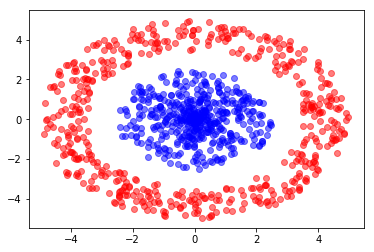

In [15]:
plt.scatter(train[train[2]==1.0][0], train[train[2]==1.0][1], c='r', label='class 1', alpha=0.51)
plt.scatter(train[train[2]==0][0], train[train[2]==0][1], c='b', label='class 0', alpha=0.51)

In [16]:
circle_model.predict(np.array([[2,0]]))

array([[0.2791427]], dtype=float32)

In [8]:
test = np.array([[ (x, y) for y in np.arange(-4, 4, 0.1)] for x in np.arange(-4, 4, 0.1)])
test.shape

(80, 80, 2)

In [9]:
_preds = np.zeros((80,80))
for i in range(80):
    for j in range(80):
        _preds[i, j] = circle_model.predict(test[i, j].reshape((1,2)))[0][0]

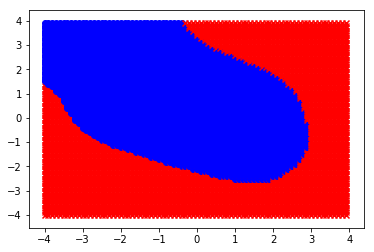

In [10]:
for i in range(80):
    for j in range(80):
        x, y = test[i, j]
        print(x, y, end='\r')
        if _preds[i, j] > 0.5:
            plt.scatter(x, y, marker='x', c='r')
        else:
            plt.scatter(x, y, marker='o', c='b')

In [11]:
img = np.ones((80, 80, 3))
for i in range(80):
    for j in range(80):
        if _preds[i, j] > 0.5:
            img[i, j, 0] = (_preds[i, j]) * 255
        else:
            img[i, j, 2] = (_preds[i, j]) * 255

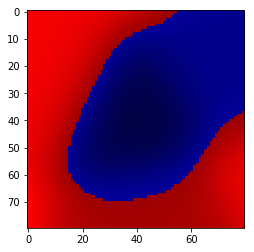

In [12]:
plt.imshow(image.array_to_img(img))

In [13]:
img[40, 40], _preds[40, 40], test[40, 40]

(array([ 1.        ,  1.        , 57.68050209]),
 0.22619804739952087,
 array([3.55271368e-15, 3.55271368e-15]))

### Testing for spiral

In [127]:
l = gen_spiral(0, 1)
m = gen_spiral(math.pi, 0)

l = np.array(l)
m = np.array(m)

l.shape, m.shape

((500, 3), (500, 3))

In [128]:
train = pd.DataFrame(np.vstack((l,m)))
train.head()

,0,1,2
0,-0.959760,1.194748,1.0
1,0.260541,0.063010,1.0
2,-0.456622,0.187632,1.0
3,-0.075861,-0.323579,1.0
4,0.284976,0.066046,1.0


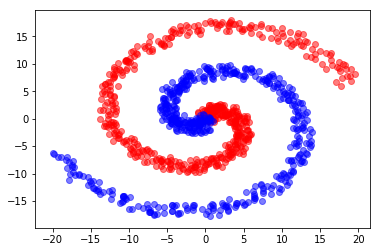

In [129]:
plt.scatter(train[train[2]==1.0][0], train[train[2]==1.0][1], c='r', alpha=0.51)
plt.scatter(train[train[2]==0][0], train[train[2]==0][1], c='b', alpha=0.51)

In [130]:
model = Sequential()
model.add(layers.Dense(16, activation='sigmoid', input_shape=(2,)))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(4, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['acc'])

In [132]:
train_x = []
train_y = []
l = (np.vstack((l, m)))
np.random.shuffle(l)
for i in l:
    train_x.append([i[0], i[1]])
    train_y.append(i[2])

train_x = np.array(train_x)
train_y = np.array(train_y)
# train_y = to_categorical(train_y)
train_x.shape, train_y.shape

((1000, 2), (1000,))

In [145]:
hist = model.fit(train_x, train_y, epochs=50, batch_size=16, verbose=True)

Epoch 1/50
1000/1000 [==============================] - 0s 97us/step - loss: 0.0163 - acc: 0.9820
Epoch 2/50
1000/1000 [==============================] - 0s 97us/step - loss: 0.0166 - acc: 0.9820
Epoch 3/50
1000/1000 [==============================] - 0s 101us/step - loss: 0.0165 - acc: 0.9830
Epoch 4/50
1000/1000 [==============================] - 0s 93us/step - loss: 0.0163 - acc: 0.9830
Epoch 5/50
1000/1000 [==============================] - 0s 101us/step - loss: 0.0162 - acc: 0.9840
Epoch 6/50
1000/1000 [==============================] - 0s 94us/step - loss: 0.0163 - acc: 0.9850
Epoch 7/50
1000/1000 [==============================] - 0s 111us/step - loss: 0.0164 - acc: 0.9850
Epoch 8/50
1000/1000 [==============================] - 0s 97us/step - loss: 0.0162 - acc: 0.9840
Epoch 9/50
1000/1000 [==============================] - 0s 86us/step - loss: 0.0162 - acc: 0.9840
Epoch 10/50
1000/1000 [==============================] - 0s 97us/step - loss: 0.0163 - acc: 0.9830
Epoch 11/50
1000

In [146]:
model.evaluate(train_x, train_y)

1000/1000 [==============================] - 0s 38us/step


[0.015548715519718826, 0.983]

### Generalizing the boundary drawing

In [17]:
def draw_boundary(model, resolution=80, max_range=20, layer=None, neuron=None):
    '''
    Plots the decision boundary for two axes between [-max_range, max_range] with res x res img output
    '''
    
    # Create the plot points
    _increment = 2 * max_range / resolution
    print(_increment)
    # X-coordinates
    Xs = np.arange(-max_range, max_range, _increment)
    # Y-coordinates
    Ys = np.arange(max_range, -max_range, -_increment)
    print(Xs.shape, Ys.shape)
    assert Xs.shape == Ys.shape
    
    _preds = np.zeros((resolution, resolution, 3))
    
    
    is_neuron_specific = False
    # Determine the decision boundary for what?
    
    if layer is None:
        # Draw full activation
        classifier = model
        neuron = 0
        
    else:
        is_neuron_specific = True
        assert layer < len(model.layers)
        output = model.layers[layer].output
        new_model = Model(inputs=model.input,
                                 outputs=output)
        classifier = new_model
        print('using custom model')
        if neuron is None:
            # Draw first neurons from specified layer
            assert layer < len(model.layers)
            neuron_index = 0
        else:
            assert layer < len(model.layers)
            assert neuron < model.layers[layer].output.get_shape()[1]
            neuron_index = neuron
    
    
#     def one_row_calc(classifier, X, Ys, neuron_index=0):
        
#         _row_pred = np.zeros((1, len(Ys), 3))
#         neuron_index = 0 
#         for i in range(len(Ys)):
#             print(X, Ys[i])
#             _val = classifier.predict(np.array([[X, Ys[i]]]))[0][neuron_index]
#             if _val > 0.5:
#                 _row_pred[0, i, 0] = _val
#             else:
#                 _row_pred[0, i, 2] = _val
        
#         return _row_pred
        
    start = time.time()
    
    
#     with ThreadPoolExecutor(max_workers=10) as executor:
#         print(Ys)
#         futures = [ executor.submit(one_row_calc, classifier, x, Ys, neuron_index) for x in Xs]
#         _preds = []
#         for future in as_completed(futures):
#             _preds.append(future.result())
        
    
    
    def _point_gen():
        for i in product(Xs, Ys):
            yield np.array([i])
            
    _vals = classifier.predict_generator(_point_gen(), steps=resolution**2, workers=5, verbose=0)
    _vals = _vals.reshape((resolution, resolution))
    
    for i in range(resolution):
        for j in range(resolution):
            val = _vals[i, j]
            if val < 0.5:
                _preds[i, j, 0] = val
            else:
                _preds[i, j, 2] = val
        
    

    end = time.time()
        
    print('Time required to compute: {} s'.format(end-start))
    _preds = np.transpose(_preds, (1, 0, 2))
    plt.imshow(Image.fromarray((_preds * 255).astype('uint8'), 'RGB'))
    
    return _preds * 255

0.5
(80,) (80,)
Time required to compute: 10.253405332565308 s


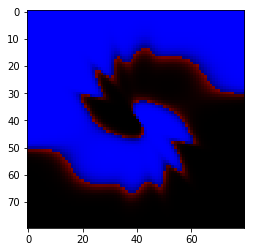

In [148]:
all_neurons = []
p = draw_boundary(model, resolution=80, max_range=20)

In [26]:
def _map(x, y, resolution, max_range):
    _increment = 2 * (max_range) / resolution
    X = (x / (_increment) + resolution / 2)
    Y = (- y / (_increment) + resolution / 2)
    return X, Y

In [167]:
print(_map(-4, 4, 80, 4))
print(_map(4, 4, 80, 4))
print(_map(-4, -4, 80, 4))
print(_map(4, -4, 80, 4))

(0.0, 0.0)
(80.0, 0.0)
(0.0, 80.0)
(80.0, 80.0)


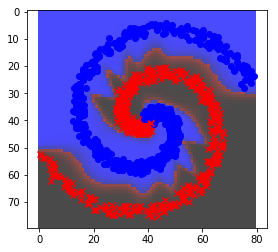

In [174]:
plt.imshow(Image.fromarray(p.astype('uint8'), 'RGB'), alpha=0.71)
for i in range(len(train_x)):
    x, y = train_x[i]
    x, y = _map(x, y, 80, 20)
    if train_y[i] == 0:
        plt.scatter(x, y, marker='x', c='r')
    else:
        plt.scatter(x, y, marker='o', c='b')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


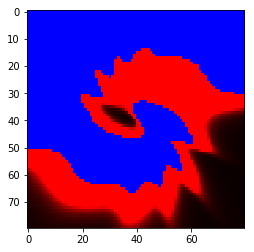

In [173]:
plt.imshow(p)

0.1
(80,) (80,)
Time required to compute: 10.23594069480896 s


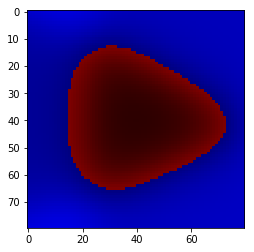

In [31]:
l = draw_boundary(circle_model, resolution=80, max_range=4)

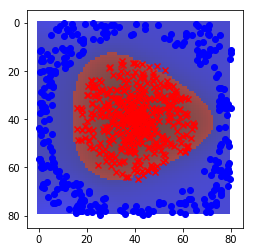

In [32]:
plt.imshow(Image.fromarray(l.astype('uint8'), 'RGB'), alpha=0.71)
for i in range(len(train_x)):
    x, y = train_x[i]
    if (x > -4 and x < 4) and (y > -4 and y < 4):
        x, y = _map(x, y, 80, 4)
        if train_y[i] == 0:
            plt.scatter(x, y, marker='x', c='r')
        else:
            plt.scatter(x, y, marker='o', c='b')